# Небесна сфера та небесні координати

## Поняття небесної сфери

> **Небесна сфера** - це уявна сфера довільного радіуса із центром у довільній точці спостереження, на яку спроектовані небесні світила. Розташування небесних тіл зображають у такому вигляді, як їх видно з центру небесної сфери у певний момент часу.

Небесна сфера виникла з практичної потреби опису положення зір у космічному просторі. Незважаючи на те, що зорі надзвичайно віддалені від Землі, і при спостереженні навіть через телескоп неможливо визначити, яка з них знаходиться далі, а яка ближче, нам здається, що всі небесні світила розташовані на однаковій відстані - на поверхні велетенської сфери, в центрі якої знаходиться спостерігач.

Залежно від розв'язуваної задачі, центр небесної сфери може бути розташований:
- у місці на поверхні Землі, де перебуває спостерігач (топоцентрична небесна сфера),
- у центрі Землі (геоцентрична небесна сфера),
- у центрі тієї або іншої планети (планетоцентрична небесна сфера),
- у центрі Сонця (геліоцентрична небесна сфера),
- у будь-якій іншій точці простору, де перебуває спостерігач (реальний чи гіпотетичний).


![Celestial Sphere 01](../images/celestial_sphere_1.png)

Image: Ілюстрація небесної сфери. На рисунку зображено три зірки, які перебувають на різній відстані від спостерігача, а також їх проекції на небесну сферу.

---

## Елементи небесної сфери

Для орієнтування на небесній сфері використовують систему координат та опорні точки (див. рисунки нижче). Ось основні з них:

> **Прямовисна лінія** - це вертикальна лінія, що проходить через центр небесної сфери. Її напрямок визначається напрямком сили тяжіння. Верхня точка перетину цієї лінії з небесною сферою називається **зенітом** $Z$, а нижня - **надиром** $Z'$. 

> **Площиною математичного (справжного) горизонту** - площина, що перпендикулярна до прямовисної лінії. **Математичний горизонт** - велике коло небесної сфери, площина якого перпендикулярна до прямовисної лінії (тобто це коло, що утворюється в результаті перетину небесної сфери та площини математичного горизонту).

> **Коло висоти** (або **вертикальне коло**) ($ZMZ'$) - це велике коло небесної сфери, що проходить через зеніт $Z$, світило $M$ і надир $Z'$.

> **Вісь світу** ($P_NP_S$) - це пряма, що проходить через центр небесної сфери паралельно осі обертання Землі. Точки перетину осі світу з небесною сферою називаються полюсами світу - **Північним полюсом світу** ($P_N$) та **Південним полюсом світу** ($P_S$).

> **Небесний екватор** - це велике коло небесної сфери, перпендикулярне до осі світу. Він ділить небесну сферу на **Північну півкулю** з вершиною в Північному полюсі світу та **Південну півкулю** з вершиною в Південному полюсі світу.

> **Коло схилень світила** ($P_NMP_S$) - це велике коло небесної сфери, що проходить через полюси світу $P_N$ та $P_S$ та через саме світило $M$.

> **Небесний меридіан** - велике коло небесної сфери, яке проходить через точки зеніта $Z$, надира $Z'$ та полюси світу $P_N$ та $P_S$. Небесний меридіан перетинається з математичним горизонтом у двох діаметрально протилежних точках. Точка перетину математичного горизонту й небесного меридіана, найближча до Північного полюса світу $P_S$, називається **точкою півночі** $N$. Точка перетину математичного горизонту й небесного меридіана, найближча до Південного полюса світу $P_S$, називається **точкою півдня** $S$. Пряма, що поєднує точки півночі й півдня, називається **полуденною лінією** ($NS$). Вона лежить на площині математичного горизонту.

> Математичний горизонт з небесним екватором також перетинаються у двох діаметрально протилежних точках — **точці сходу** ($E$) та **точці заходу** ($W$). Якщо спостерігач стоїть в центрі небесної сфери обличчям до точки півночі, праворуч від нього буде розташована точка сходу, а ліворуч — точка заходу.

> Видимий річний шлях Сонця по небесній сфері серед зір називається **екліптикою**. Екліптика перетинає небесний екватор у точках весняного ($\gamma$) та осіннього ($\Omega$) рівнодення. Ці точки відповідають моментам, коли тривалість дня дорівнює тривалості ночі (близько 21 березня та 23 вересня відповідно).


![Celestial Sphere 02](../images/celestial_sphere_2.png)

Image: Небесна сфера з основними лініями, площинами та точками (усі означення подані вище)

---

Примітка: код нижче генерує інтерактивну 3D модель небесної сфери, однак він занадто складний для новачків

In [11]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# ========================================================================
# Допоміжні функції
# ========================================================================

def normalize(v):
    """Нормує вектор v до довжини 1."""
    return v / np.linalg.norm(v)

def param_sphere(num_phi=30, num_theta=60):
    """
    Повертає сітки (X, Y, Z) для відмалювання сфери радіуса 1.
    phi – полярний кут від 0 до pi,
    theta – азимутальний кут від 0 до 2*pi.
    """
    phi = np.linspace(0, np.pi, num_phi)
    theta = np.linspace(0, 2*np.pi, num_theta)
    phi, theta = np.meshgrid(phi, theta)
    
    X = np.sin(phi) * np.cos(theta)
    Y = np.sin(phi) * np.sin(theta)
    Z = np.cos(phi)
    return X, Y, Z

def circle_on_sphere(normal, steps=100):
    """
    Повертає координати (x, y, z) великого кола на сфері,
    яке лежить у площині, перпендикулярній до normal, і проходить через (0,0,0).
    (normal має бути нормований).
    """
    # Знайдемо будь-які два взаємно перпендикулярні вектори u, v у площині кола
    # (тобто вони перпендикулярні до normal).
    # Найпростіше – взяти довільний вектор, перетнути з normal, і ще раз перетнути з normal.
    # Але простіше зафіксувати "eZ = (0,0,1)", якщо воно не вироджене до normal.
    
    # Якщо normal (майже) колінеарний до (0,0,1), то можна взяти іншу "базу".
    # Тут для наочності зробимо універсальний підхід.
    
    # Умовно візьмемо eX = (1,0,0) і eY = (0,1,0), eZ = (0,0,1)
    # і дивитимемось, з яким вектором normal найменше колінеарна.
    cand = [
        np.array([1,0,0]),
        np.array([0,1,0]),
        np.array([0,0,1])
    ]
    # Знайдемо вектор, який найменше паралельний до normal (через косинус кута)
    dotvals = [abs(np.dot(normal, c)) for c in cand]
    e = cand[np.argmin(dotvals)]
    
    # Будуємо базис у площині
    u = np.cross(normal, e)
    u = normalize(u)
    v = np.cross(normal, u)
    v = normalize(v)
    
    # Випараметризуємо коло: X(t) = u*cos(t) + v*sin(t)
    t = np.linspace(0, 2*np.pi, steps)
    circle_x = []
    circle_y = []
    circle_z = []
    for ang in t:
        point = np.cos(ang)*u + np.sin(ang)*v
        circle_x.append(point[0])
        circle_y.append(point[1])
        circle_z.append(point[2])
    return np.array(circle_x), np.array(circle_y), np.array(circle_z)

def circle_through_3pts(p1, p2, p3, steps=200):
    """
    Для трьох точок на сфері (p1, p2, p3) будуємо коло (або "велике/мале коло"),
    що проходить через ці три точки (якщо вони не колінеарні).
    
    Повертає (x_arc, y_arc, z_arc) – дугу на сфері, яка іде від p1 до p3
    через p2 (тобто та частина кола, де p2 "лежить між" p1 та p3").
    
    Ідея аналогічна вашій arc_from_3pts, але тепер у 3D:
    1) Знаходимо площину, що проходить через p1, p2, p3 (через 0,0,0, якщо вважаємо сферу у центрі).
       – Оскільки O=(0,0,0) теж у центрі сфери, припустимо, що p1, p2, p3 лежать на сфері радіуса 1.
    2) Визначаємо вектор normal = (p1 x p2) + (p2 x p3) + (p3 x p1) (або простіше: p1 x p2 + ...),
       щоб отримати "напрям" площини, у якій лежить коло.
    3) Параметризуємо коло (intersection plane & sphere).
    4) Визначаємо дві можливі дуги (бо коло – повне). Вибираємо ту, де p2 лежить "посередині".
    """
    # Перевіримо, чи не колінеарні (або майже) p1, p2, p3.
    # Якщо площа трикутника дуже мала – повертаємо порожній результат.
    # Площа ~ ||(p2 - p1) x (p3 - p1)|| / 2
    area = np.linalg.norm(np.cross(p2 - p1, p3 - p1)) / 2
    if area < 1e-12:
        return np.array([]), np.array([]), np.array([])
    
    # Нормальний вектор до площини, що проходить через p1,p2,p3
    # (і через (0,0,0), якщо точки на сфері).
    # Точніше, normal визначимо як cross(p1, p2) + cross(p2, p3) + cross(p3, p1)
    # Це забезпечить орієнтацію, яка "захоплює" всі три точки. Але можна й простіше:
    plane_normal = np.cross(p1, p2) + np.cross(p2, p3) + np.cross(p3, p1)
    plane_normal = normalize(plane_normal)
    
    # Повне коло у цій площині
    cx, cy, cz = circle_on_sphere(plane_normal, steps=4*steps)  # щоб арка була плавніша
    
    # Тепер треба знайти, де на цьому колі лежать p1, p2, p3 (кути).
    # У параметризації кола X(t)=u cos(t)+v sin(t) ми заздалегідь не зберігали t,
    # тож зробимо простіше: знайдемо найближчі індекси до p1, p2, p3.
    
    # Допоміжна функція для пошуку найближчої точки
    def find_nearest_idx(xarr, yarr, zarr, p):
        # мінімізуємо відстань ||(x_i,y_i,z_i) - p||
        dist = (xarr - p[0])**2 + (yarr - p[1])**2 + (zarr - p[2])**2
        return np.argmin(dist)
    
    i1 = find_nearest_idx(cx, cy, cz, p1)
    i2 = find_nearest_idx(cx, cy, cz, p2)
    i3 = find_nearest_idx(cx, cy, cz, p3)
    
    # Кожна пара (i1,i3) задає дві дуги: прямий обхід і зворотний.
    # Подивимось, яка з них "містить" i2.
    n = len(cx)
    
    def arc_indices(i_start, i_end):
        """Повертає послідовність індексів від i_start до i_end (по модулю n)."""
        if i_end >= i_start:
            return np.arange(i_start, i_end+1)
        else:
            return np.concatenate([np.arange(i_start, n), np.arange(0, i_end+1)])
    
    arc1 = arc_indices(i1, i3)
    arc2 = arc_indices(i3, i1)
    
    # Перевіряємо, де лежить i2
    def in_arc(i2, arc):
        return i2 in arc
    
    if in_arc(i2, arc1):
        arc_idx = arc1
    else:
        arc_idx = arc2
    
    return cx[arc_idx], cy[arc_idx], cz[arc_idx]

# ========================================================================
# Основна побудова 3D
# ========================================================================

# Створюємо фігуру
fig = make_subplots(rows=1, cols=1,
                    specs=[[{'type':'scatter3d'}]],
                    subplot_titles=["Небесна сфера в 3D"])

# 1) Небесна сфера як поверхня
Xs, Ys, Zs = param_sphere()
sphere_surface = go.Surface(
    x = Xs, y = Ys, z = Zs,
    colorscale='Blues',
    opacity=0.3,
    showscale=False,
    name='Celestial Sphere'
)
fig.add_trace(sphere_surface, row=1, col=1)

# 2) Точки та лінії
data_traces = []

# --- Спостерігач у центрі ---
O = np.array([0, 0, 0])
scatter_O = go.Scatter3d(
    x=[O[0]], y=[O[1]], z=[O[2]],
    mode='markers+text',
    text=["O"],
    textposition="middle left",
    marker=dict(size=5, color="black"),
    name="Спостерігач (O)"
)
data_traces.append(scatter_O)

# --- Z та Z' (вертикальна вісь) ---
Z = np.array([0,0,1])
Zp = np.array([0,0,-1])
scatter_ZZp = go.Scatter3d(
    x=[0,0], y=[0,0], z=[1,-1],
    mode='lines+markers+text',
    text=["Z", "Z'"],
    textposition=["bottom left","bottom center"],
    line=dict(color='red', width=3),
    marker=dict(size=4, color="red"),
    name="Прямовисна лінія (ZZ')"
)
data_traces.append(scatter_ZZp)

# --- Кардинальні точки N, S, E, W на площині z=0 ---
N = np.array([1,0,0])
S = np.array([-1,0,0])
E = np.array([0,-1,0])
W = np.array([0,1,0])

scatter_cardinals = go.Scatter3d(
    x=[N[0], S[0], E[0], W[0]],
    y=[N[1], S[1], E[1], W[1]],
    z=[N[2], S[2], E[2], W[2]],
    mode='markers+text',
    text=["N","S","E","W"],
    textposition=["middle right","middle left","bottom center","bottom center"],
    marker=dict(size=5, color="green"),
    name="Точка півночі (N), півдня (S), сходу (E), заходу (W)"
)
data_traces.append(scatter_cardinals)

# --- Горизонт (коло z=0 на сфері) ---
theta = np.linspace(0, 2*np.pi, 200)
horiz_x = np.cos(theta)
horiz_y = np.sin(theta)
horiz_z = np.zeros_like(theta)

scatter_horizon = go.Scatter3d(
    x=horiz_x, y=horiz_y, z=horiz_z,
    mode='lines',
    line=dict(color='black', dash='dash', width=2),
    name="Математичний горизонт (z=0)"
)
data_traces.append(scatter_horizon)

# --- Вісь світу P_N, P_S з нахилом alpha = 35° ---
alpha_deg = 35
alpha = np.radians(alpha_deg)

# Припустимо, що у "стандартному" положенні полюс був би (0,0,1).
# Тоді повернемо його навколо осі Y на кут alpha (змінюючи нахил у площині x-z).
Ry = np.array([
    [ np.cos(alpha), 0, np.sin(alpha)],
    [ 0,             1, 0            ],
    [-np.sin(alpha), 0, np.cos(alpha)]
])

PN = Ry.dot(np.array([0,0,1]))  # Північний полюс
PS = -PN                       # Південний полюс

scatter_axis = go.Scatter3d(
    x=[PN[0], PS[0]], y=[PN[1], PS[1]], z=[PN[2], PS[2]],
    mode='lines+markers+text',
    text=["P<sub>N</sub>", "P<sub>S</sub>"],
    textposition=["top center","bottom center"],
    line=dict(color='blue', width=3),
    marker=dict(size=4, color="blue"),
    name="Вісь світу"
)
data_traces.append(scatter_axis)

# --- Небесний екватор (велике коло перпендикулярне осі P_NP_S) ---
pn_normal = normalize(PN)  # це напрям осі
eq_x, eq_y, eq_z = circle_on_sphere(pn_normal)  # коло, перпендикулярне PN
scatter_equator = go.Scatter3d(
    x=eq_x, y=eq_y, z=eq_z,
    mode='lines',
    line=dict(color='green', dash='dash', width=3),
    name="Небесний екватор"
)
data_traces.append(scatter_equator)

# --- Приклад розташування світила M на сфері ---
# Нехай спочатку в 2D ви мали M=(0.3,0.8). У 3D додамо невеликий z і нормуємо:
M_init = np.array([0.4, 0.7, 0.5])
M = normalize(M_init)

scatter_M = go.Scatter3d(
    x=[M[0]], y=[M[1]], z=[M[2]],
    mode='markers+text',
    text=["M"],
    textposition="top center",
    marker=dict(size=5, color='red'),
    name="Світило (M)"
)
data_traces.append(scatter_M)

# --- "Вертикаль" (коло, що проходить через Z, M, Z') ---
v_x, v_y, v_z = circle_through_3pts(Z, M, Zp)
if len(v_x) > 0:
    scatter_vertical = go.Scatter3d(
        x=v_x, y=v_y, z=v_z,
        mode='lines',
        line=dict(color='red', width=3, dash='dot'),
        name="Коло висоти (ZMZ')"
    )
    data_traces.append(scatter_vertical)

# --- Коло схилень (через P_N, M, P_S) ---
d_x, d_y, d_z = circle_through_3pts(PN, M, PS)
if len(d_x) > 0:
    scatter_decl = go.Scatter3d(
        x=d_x, y=d_y, z=d_z,
        mode='lines',
        line=dict(color='blue', width=3, dash='dot'),
        name="Коло схилень (P<sub>N</sub>MP<sub>S</sub>)"
    )
    data_traces.append(scatter_decl)

# --- Небесний меридіан (через Z, Z' та полюси світу P_N, P_S)
# Обираємо Z та P_N для визначення площини меридіану.
merid_plane_normal = normalize(np.cross(Z, PN))
merid_x, merid_y, merid_z = circle_on_sphere(merid_plane_normal, steps=200)
scatter_meridian = go.Scatter3d(
    x=merid_x, y=merid_y, z=merid_z,
    mode='lines',
    line=dict(color='black', width=3),
    name="Небесний меридіан"
)
data_traces.append(scatter_meridian)

# Додаємо всі лінії/точки до фігури
for tr in data_traces:
    fig.add_trace(tr, row=1, col=1)

# Налаштування 3D-сцени
fig.update_layout(
    # title="Небесна сфера в 3D",
    scene=dict(
        xaxis=dict(
            range=[-1.5, 1.5], 
            showgrid=False, zeroline=False, visible=False
        ),
        yaxis=dict(
            range=[-1.5, 1.5], 
            showgrid=False, zeroline=False, visible=False
        ),
        zaxis=dict(
            range=[-1.5, 1.5], 
            showgrid=False, zeroline=False, visible=False
        ),
        aspectmode='cube',
        camera=dict(
            eye=dict(x=0.8, y=0.5, z=0.3)
        ),
    ),
    showlegend=True,
    autosize=True, height=500
)

fig.show()


## Системи небесних координат

На небесній сфері розрізняють кілька систем координат: горизонтальну, першу екваторіальну, другу екваторіальну, екліптичну та галактичну. Кожна з них має свою основну площину та точку відліку.

**Горизонтальна система координат**

Ця система пов'язана із Землею, а не із зорями. В ній проводиться умовна прямовисна лінія через центр Землі, яка збігається з напрямком сили тяжіння в місці спостереження і перетинає небесну сферу в двох точках:
- Зеніт - верхня точка перетину
- Надир - нижня точка перетину

Великий круг небесної сфери, площина якого перпендикулярна до прямовисної лінії, називається математичним горизонтом. Він ділить поверхню небесної сфери на дві півкулі:
- Видиму для спостерігача (з вершиною в зеніті)
- Невидиму (з вершиною в надирі)

Важливо розуміти, що математичний горизонт не збігається з видимим горизонтом спостерігача через нерівності поверхні Землі та викривлення променів світла в атмосфері.

Велике коло, що проходить через світило, точку зеніту й точку надира, називається вертикальним колом або вертикалом.

У горизонтальній системі координат положення світила визначається двома координатами:
1. Висота світила над горизонтом h (або його зенітна відстань z, причому z = 90° - h)
2. Азимут A - кутова відстань, яка відраховується по математичному горизонту від точки півдня до вертикала світила

**Добовий рух світил**

Внаслідок обертання Землі навколо своєї осі всі світила на небесній сфері здійснюють добовий рух навколо осі світу, роблячи один оберт за добу (зоряна доба). При тривалому спостереженні можна помітити, що зорі начебто обертаються навколо Північного полюса світу (умовно - навколо Полярної зорі).

**Небесний екватор і екліптика**

Площина небесного екватора перпендикулярна до осі світу і перетинає небесну сферу по великому колу. Це коло називається небесним екватором. Він ділить небесну сферу на Північну півкулю з вершиною в Північному полюсі світу та Південну півкулю з вершиною в Південному полюсі світу.

Екліптика - це великий круг небесної сфери по якому Сонце здійснює свій видимий річний рух відносно зір. Площина екліптики перетинається з площиною небесного екватора під кутом ε = 23°26'. 

Екліптика перетинається з небесним екватором у двох важливих точках:
- Точка весняного рівнодення (позначається знаком сузір'я Овна ♈) - тут Сонце переходить з Південної небесної півкулі в Північну (приблизно 21 березня)
- Точка осіннього рівнодення - тут Сонце переходить з Північної півкулі в Південну (близько 23 вересня)

На екліптиці також виділяють точки, що віддалені від точок рівнодення на 90°:
- Точка літнього сонцестояння (у Північній півкулі)
- Точка зимового сонцестояння (у Південній півкулі)

**Екваторіальна система координат**

В екваторіальній системі небесних координат основною площиною є небесний екватор. Існує два варіанти цієї системи:

У першій екваторіальній системі координатами світила є:
- Схилення (δ) - кут між площиною небесного екватора і напрямком на об'єкт
- Годинний кут (t) - вимірюється в годинній мірі (години, хвилини, секунди)

У другій екваторіальній системі замість годинного кута використовується:
- Пряме сходження (α) - відраховується в напрямку, протилежному добовому обертанню небесної сфери від точки весняного рівнодення

Схилення δ, полярна відстань p і пряме сходження α світил під час добового обертання небесної сфери не змінюються, але можуть змінюватися внаслідок власних рухів світил.

**Екліптична система координат**

В екліптичній системі основною площиною є площина екліптики. Ця система була зручною тому, що стародавні кутомірні інструменти, такі як армілярна сфера, були пристосовані для вимірювання безпосередньо екліптичних координат Сонця, планет і зір.

**Галактична система координат**

Ця система використовується для вивчення нашої Галактики і почала застосовуватися порівняно недавно. Основною площиною в ній є площина галактичного екватора - площина симетрії Чумацького Шляху.

Всі ці системи координат дозволяють точно визначати положення небесних об'єктів та вивчати їх рух на небесній сфері. Вибір конкретної системи залежить від поставленої задачі та об'єктів спостереження.

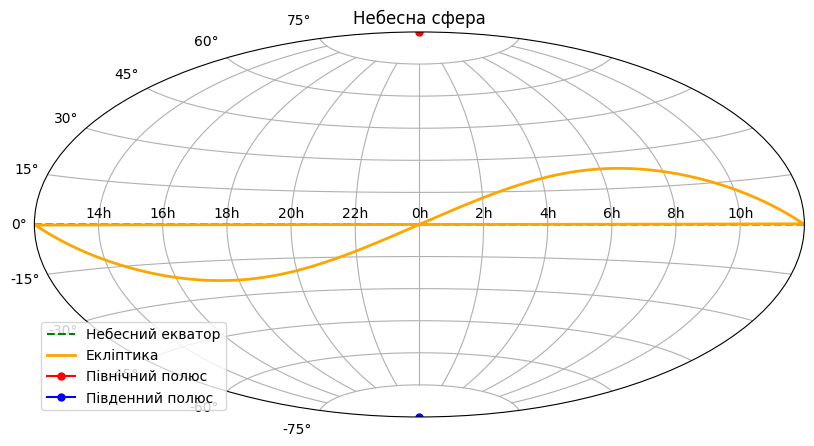

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Створюємо фігуру з проекцією Aitoff
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="aitoff")
ax.grid(True)
ax.set_title("Небесна сфера")

# Налаштування міток по RA (правий висота) у годинах
# RA в проекції Aitoff має бути в радіанах і лежати в діапазоні [-π, π]
tick_labels = ['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h']
tick_positions = np.radians(np.linspace(-150, 150, len(tick_labels)))
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Додавання лінії небесного екватора (де деклинація = 0)
RA_eq = np.linspace(-np.pi, np.pi, 360)
dec_eq = np.zeros_like(RA_eq)
ax.plot(RA_eq, dec_eq, color="green", linestyle="--", label="Небесний екватор")

# Додавання лінії екліптики
# Кут нахилу екліптики ε приблизно 23.5° (переводимо в радіани)
epsilon = np.radians(23.5)
# Генеруємо значення довгот (ecliptic longitude) від 0 до 2π
lambda_vals = np.linspace(0, 2*np.pi, 360)
# Перетворюємо координати екліптики (довгота, широта=0) в екваторіальні координати
# Формули:
#   RA = arctan2(sin(λ)*cos(ε), cos(λ))
#   dec = arcsin(sin(λ)*sin(ε))
RA_ecl = np.arctan2(np.sin(lambda_vals) * np.cos(epsilon), np.cos(lambda_vals))
dec_ecl = np.arcsin(np.sin(lambda_vals) * np.sin(epsilon))
# Коригуємо RA, щоб значення були в діапазоні [-π, π]
RA_ecl = np.where(RA_ecl > np.pi, RA_ecl - 2*np.pi, RA_ecl)
RA_ecl = np.where(RA_ecl < -np.pi, RA_ecl + 2*np.pi, RA_ecl)
ax.plot(RA_ecl, dec_ecl, color="orange", linewidth=2, label="Екліптика")

# Додавання точок для Північного та Південного небесних полюсів
# Північний небесний полюс: dec = +90° (π/2), Південний: dec = -90° (-π/2)
ax.plot(0, np.pi/2, marker="o", markersize=5, color="red", label="Північний полюс")
ax.plot(0, -np.pi/2, marker="o", markersize=5, color="blue", label="Південний полюс")

# Відображення легенди
ax.legend(loc="lower left")

plt.show()


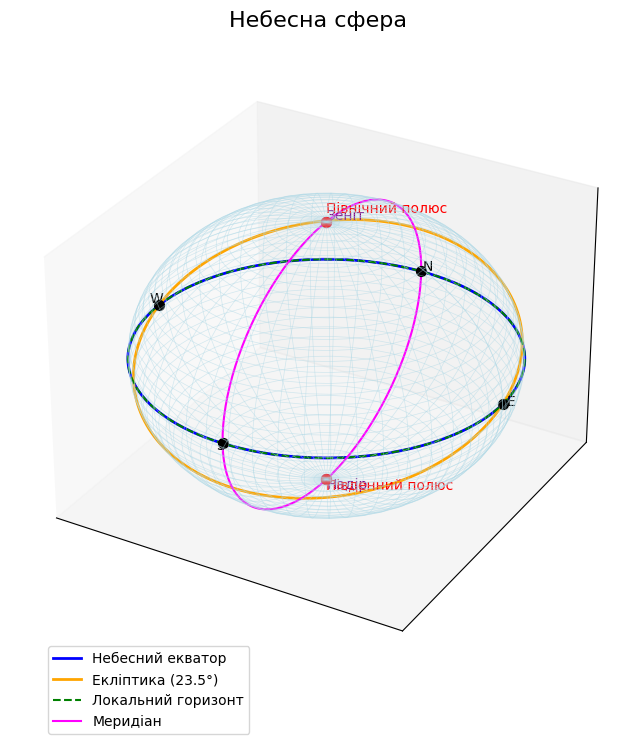

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --------------------------------------
# Параметри
# --------------------------------------
# Кількість точок для побудови сітки сфери
N = 50
# Нахил екліптики відносно екватора (прибл. 23.5 градусів у реальності)
tilt_ecliptic_deg = 23.5
tilt_ecliptic_rad = np.deg2rad(tilt_ecliptic_deg)

# --------------------------------------
# Створюємо сферу
# --------------------------------------
phi = np.linspace(0, np.pi, N)        # від 0 до π
theta = np.linspace(0, 2*np.pi, N)    # від 0 до 2π
phi, theta = np.meshgrid(phi, theta)

# Радіус сфери (умовно 1)
r = 1

# Переходимо до декартових координат
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# --------------------------------------
# Створюємо фігуру та 3D-вісь
# --------------------------------------
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Небесна сфера", fontsize=16, pad=20)

# Налаштовуємо межі від -1 до 1 по всіх осях
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Прибираємо осьові лінійки для більш естетичного вигляду
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# --------------------------------------
# Малюємо поверхню сфери (напівпрозорий wireframe)
# --------------------------------------
ax.plot_wireframe(x, y, z, color='lightblue', linewidth=0.5, alpha=0.5)

# --------------------------------------
# 1. Небесний екватор
# --------------------------------------
# Небесний екватор: площина z = 0 (якщо екватор проходить через центр сфери)
# param: t від 0 до 2π
t = np.linspace(0, 2*np.pi, 200)
xeq = r * np.cos(t)
yeq = r * np.sin(t)
zeq = np.zeros_like(t)
ax.plot(xeq, yeq, zeq, color='blue', linewidth=2, label='Небесний екватор')

# --------------------------------------
# 2. Екліптика
# --------------------------------------
# Екліптика нахилена на tilt_ecliptic_deg (прибл. 23.5°)
# Обертання кола в площині XZ чи YZ навколо осі X (або Y) 
# Для спрощення візьмемо, що екліптика нахилена навколо осі X.
xecl = r * np.cos(t)
yecl = r * np.sin(t) * np.cos(tilt_ecliptic_rad)
zecl = r * np.sin(t) * np.sin(tilt_ecliptic_rad)
ax.plot(xecl, yecl, zecl, color='orange', linewidth=2, label='Екліптика (23.5°)')

# --------------------------------------
# 3. "Горизонт" (умовний локальний горизонт) 
# --------------------------------------
# Припустимо, що це площина xy, тож z = 0
# Візьмемо той самий параметр t, але намалюємо коло радіуса 1 в площині xy
xh = r * np.cos(t)
yh = r * np.sin(t)
zh = np.zeros_like(t)
# Зафарбуємо "горизонт" іншою лінією (пунктир) 
ax.plot(xh, yh, zh, color='green', linestyle='--', linewidth=1.5, label='Локальний горизонт')

# --------------------------------------
# 4. Основні точки: Зеніт, Надір, Полюси, Кардинальні точки
# --------------------------------------

# Зеніт: (0, 0, +1)
zenith = np.array([0, 0, r])
# Надір: (0, 0, -1)
nadir = np.array([0, 0, -r])

# Північний Полюс (небесний): (0, 0, +1) - Вже збігається з "Зенітом" у цій моделі,
# але часто розрізняють ці поняття. Для ілюстрації можна намалювати інший вектор.
# У спрощеній моделі це теж (0,0,1).
north_pole = np.array([0, 0, r])
south_pole = np.array([0, 0, -r])

# Кардинальні точки на горизонті: N(0, +1, 0), S(0, -1, 0), E(+1, 0, 0), W(-1, 0, 0)
N = np.array([0, r, 0])
S = np.array([0, -r, 0])
E = np.array([r, 0, 0])
W = np.array([-r, 0, 0])

# Функція для нанесення точок та підписів
def plot_point_and_label(ax, point, label, color='red', s=50, text_offset=(0,0,0.02)):
    ax.scatter(point[0], point[1], point[2], color=color, s=s)
    ax.text(point[0] + text_offset[0], 
            point[1] + text_offset[1],
            point[2] + text_offset[2],
            label, color=color, fontsize=10)

# Наносимо точки та підписи
plot_point_and_label(ax, zenith, 'Зеніт', 'purple')
plot_point_and_label(ax, nadir, 'Надір', 'purple', text_offset=(0,0,-0.07))

plot_point_and_label(ax, north_pole, 'Північний полюс', 'red', text_offset=(0,0,0.07))
plot_point_and_label(ax, south_pole, 'Південний полюс', 'red', text_offset=(0,0,-0.07))

plot_point_and_label(ax, N, 'N', 'black', text_offset=(0,0.02,0))
plot_point_and_label(ax, S, 'S', 'black', text_offset=(0,-0.06,0))
plot_point_and_label(ax, E, 'E', 'black', text_offset=(0.02,0,0))
plot_point_and_label(ax, W, 'W', 'black', text_offset=(-0.06,0,0))

# --------------------------------------
# 5. Меридіан (коло, що проходить через N, S, Зеніт, Надір)
# --------------------------------------
# Меридіан можна розглядати як переріз сфери площиною, що містить точки (0,0,0), N, S, Зеніт, Надір.
# У нашій спрощеній моделі це площина yz (x=0). 
# Тоді коло задається: x=0, y = cos(t'), z = sin(t') (і навпаки, залежно від вибору)
t2 = np.linspace(-np.pi/2, 3*np.pi/2, 200)
xm = np.zeros_like(t2)
ym = r * np.cos(t2)
zm = r * np.sin(t2)
ax.plot(xm, ym, zm, color='magenta', linewidth=1.5, label='Меридіан')

# --------------------------------------
# Легенда
# --------------------------------------
ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.05))

plt.show()



## Системи небесних координат

На небесній і земній сферах можна провести певні кола, отримавши точки та лінії, за допомогою яких визначаються небесні координати світил. Залежно від вибору головної площини та точки відліку на ній розрізняють такі системи координат:
- горизонтальну
- першу екваторіальну
- другу екваторіальну
- екліптичну
- галактичну

## Горизонтальна система координат

Горизонтальна система координат пов'язана із Землею, а не із зорями. Для її розуміння потрібно уявити себе спостерігачем і провести умовну прямовисну лінію, яка:
- проходить через центр Землі
- збігається з напрямком сили тяжіння в місці спостереження
- перетинає небесну сферу в двох точках, які називають зеніт і надир

**Сузір'я та орієнтування на небесній сфері**

З давніх часів для зручності орієнтування на зоряному небі людство об'єднувало яскраві зорі в групи - сузір'я. Деякі сузір'я містять виразні фігури, які легко впізнати: Велика Ведмедиця нагадує ківш, Оріон - фігуру мисливця, Лев - контур лежачого лева. Хоча різні культури могли бачити різні образи в одних і тих же зоряних конфігураціях, деякі найпомітніші групування зір визнаються більшістю культур, навіть якщо вони отримують різні назви.

Цікаво, що українські назви сузір'їв часто є перекладами грецьких або латинських назв, але існують і народні назви. Наприклад:
- Велика Ведмедиця також відома як Великий Віз
- Мала Ведмедиця - як Малий Віз
- Кассіопея називається Бороною або Пасікою
- Сузір'я Оріона в народі називають Косарі
- Плеяди відомі як Стожари

**Визначення відстаней у космосі**

Для вимірювання космічних відстаней використовують спеціальні одиниці:

Астрономічна одиниця (а.о.) - це середня відстань між центрами Землі та Сонця, що приблизно дорівнює 150 мільйонів кілометрів.

Світловий рік (св. рік) - відстань, яку проходить світло за один рік, рухаючись зі швидкістю 300 000 км/с. Один світловий рік дорівнює $10^{13}$ км.

**Найяскравіші зорі**

Серед найяскравіших зір нашого неба особливе місце займають:
- Сіріус (сузір'я Великого Пса) з видимою зоряною величиною -1,47
- Канопус (α Кіля) з величиною -0,72
- Арктур (сузір'я Волопаса) з величиною -0,04
- Вега (сузір'я Ліри) з величиною +0,03

Для визначення видимих зоряних величин небесних світил астрономи використовують як еталон Північний полярний ряд - сукупність 96 зір, розташованих навколо Північного полюса світу. Найяскравіша серед них - Полярна зоря - має зоряну величину +2m.

Сучасні методи спостереження дозволяють:
- У бінокль побачити зорі до +8m
- У шкільний телескоп - до +11m
- За допомогою найбільших телескопів можна зареєструвати слабкі галактики до +28m


**Небесний екватор та екліптика**

**Небесний екватор** — велике коло, яке проходить через центр небесної сфери і перпендикулярне до осі світу. Воно ділить небесну сферу на дві частини:
- **Північну півкулю**.
- **Південну півкулю**.

Особливе значення має **екліптика** — видимий річний шлях Сонця серед зір. Екліптика перетинає небесний екватор у двох точках:
- **Точка весняного рівнодення (♈)**.
- **Точка осіннього рівнодення (♎)**.

---

**Сузір’я**

Сузір’я — це ділянки небесної сфери, які виділені для зручності орієнтування серед зір. Їх межі визначені Міжнародним астрономічним союзом. Деякі сузір’я містять яскраві зорі, які формують характерні контури, наприклад:
- **Велика Ведмедиця** (контур ковша).
- **Оріон** (фігура мисливця).

> Сузір'я - ділянки небесної сфери, на які подіблені окремі групи зір для зручності орієнтування.


---

**Зоряні величини**

Яскравість зір вимірюється у **зоряних величинах (m)**. Умовно поділяють зорі на шість видимих класів:
1. Найяскравіші зорі — 1-ї зоряної величини.
2. Ледь видимі зорі — 6-ї зоряної величини.

Формула, що описує відношення яскравостей двох зір:
$$
\frac{E_1}{E_2} = 10^{0.4 \cdot (m_2 - m_1)}
$$

Де:
- $E_1$ та $E_2$ — яскравості зір.
- $m_1$ та $m_2$ — зоряні величини.

Наприклад, найяскравіша зоря нічного неба — Сіріус, має зоряну величину $m = -1.47$. Для порівняння, найяскравіша планета Венера має $m = -4.5$, а Сонце — $m = -26.7$.

---

**Додатково: Зв’язок із культурами**

Українські назви сузір’їв, як-от Великий Віз чи Чумацький Шлях, походять із народних традицій. Також часто використовуються адаптовані грецькі та латинські назви.




**Математична довідка**

В астрономії для вимірювання кутів використовують такі одиниці:
- Радіан: $1$ радіан = $\frac{360°}{2\pi}$ = $57°,3$ = $206265''$
- Градус: $1°$ - це центральний кут, який відповідає $\frac{1}{24}$ частини кола
- $1°$ = $60'$ = $3600''$, очевидно, що $1°$ = $15'$, $1'$ = $15''$

**Зоряні величини**

Для характеристики яскравості небесних світил використовують шкалу зоряних величин, започатковану давньогрецьким астрономом Гіппархом. Він розділив видимі зорі на 6 класів за їх яскравістю. 

В XIX столітті астроном Н. Погсон запропонував математичне обґрунтування цієї шкали. Згідно з формулою Погсона, відношення освітленостей від двох зір можна виразити через їх зоряні величини $m_1$ та $m_2$:

$\frac{E_1}{E_2} = 10^{0,4(m_2-m_1)}$

Найслабші зорі, які можна побачити неозброєним оком, мають зоряну величину $m = +6m$. За допомогою сучасних телескопів можна спостерігати об'єкти до $+28m$. Найяскравіші об'єкти мають від'ємні зоряні величини: для Сіріуса $m = -1,6m$, для Венери $m = -4,5m$, для Сонця $m = -26,7m$.

## Математичні величини в астрономії

В астрономії для вимірювання кутів використовуються такі одиниці:
- градуси
- радіани
- години

### Важливі співвідношення:
1 радіан = 360°/(2π) = 57°,3 = 206265″

Для часових мір:
- 1ʰ (година) - це центральний кут, який відповідає 1/24 частини кола
- 1ʰ = 60ᵐ = 3600ˢ
- 1ʰ = 15°, 1ᵐ = 15′, 1ˢ = 15″